## Logistic regressor

가장 간단한 신경망은 Logistic regressor입니다. Logistic regressor의 인풋은 범위는 정해져 있지 않고 아웃풋은 0~1사이입니다.  

In [21]:
import numpy as np
np.random.seed(1)

In [22]:
X = np.array([[0, 1, 0],
            [1, 0, 0],
            [1, 1, 1],
            [0, 1, 1]])

y = np.array([[0, 1, 1, 0 ]]).T

인풋의 모든 값을 0~1사이로 압축해야 합니다. 아래는 활성화 함수입니다.

In [23]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

평균이 0이고 표준편차가 1인  램덤 값을 얻는다.

In [25]:
W = 2*np.random.random((3, 1)) - 1
b = 0

In [26]:
z = X.dot(W) + b

In [27]:
A = sigmoid(z)

In [28]:
print(A)

[[0.60841366]
 [0.45860596]
 [0.3262757 ]
 [0.36375058]]


binary cross entorpy loss

In [29]:
def bce_loss(y, y_hat):
    N = y.shape[0]
    loss = -1/N * np.sum(( y * np.log(y_hat) + (1 - y)*np.log(1-y_hat) ))
    return loss

In [30]:
loss = bce_loss(y, A)
print(loss)

0.8223225820877986


## Backpropagation

parameter를 업데이트하기 위해 weight와 bias 각각의 손실함수의 미분을 계산해야 합니다. 

In [31]:
W = 2*np.random.random((3,1)) - 1
b = 0

alpha = 1

epochs = 20

N = y.shape[0]

In [32]:
losses = []
for i in range(epochs):
    # Forward pass
    z = X.dot(W) + b
    A =sigmoid(z)
    
    # Calculate loss
    loss = bce_loss(y, A)
    print('Epoch: ', i, 'Loss: ', loss)
    losses.append(loss)
    # Calculate derivatives
    dz = (A - y)
    dW = 1/N * np.dot(X.T, dz)
    db = 1/N * np.sum(dz, axis=0, keepdims=True)
    
    # Parameter updates
    W -= alpha * dW
    b -= alpha * db

Epoch:  0 Loss:  0.8907627075279007
Epoch:  1 Loss:  0.6927760160745733
Epoch:  2 Loss:  0.5898451770659854
Epoch:  3 Loss:  0.5280885451830415
Epoch:  4 Loss:  0.4820073214455976
Epoch:  5 Loss:  0.44368423755499686
Epoch:  6 Loss:  0.41060585370411384
Epoch:  7 Loss:  0.38165051378604337
Epoch:  8 Loss:  0.3561084424371502
Epoch:  9 Loss:  0.3334450250738084
Epoch:  10 Loss:  0.31323197922576923
Epoch:  11 Loss:  0.29511860660977185
Epoch:  12 Loss:  0.2788147565057779
Epoch:  13 Loss:  0.26407867672883883
Epoch:  14 Loss:  0.2507077275683651
Epoch:  15 Loss:  0.23853110552406673
Epoch:  16 Loss:  0.2274040783772286
Epoch:  17 Loss:  0.21720338508576542
Epoch:  18 Loss:  0.20782354315100746
Epoch:  19 Loss:  0.19917386778993895


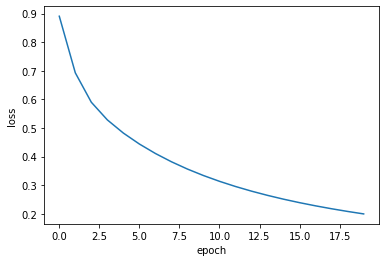

In [33]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## A deeper network

In [50]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

def sigmoid(x):
    return 1/(1+np.exp(-x))

def bce_loss(y, y_hat):
    minval = 0.000000000001
    N = y.shape[0]
    return -1/N * np.sum(y * np.log(y_hat.clip(min=minval)) + (1-y) * np.log((1-y_hat).clip(min=minval)))

def bce_loss_derivative(y,y_hat):
    return (y_hat-y)

In [51]:
def forward_prop(model, a0):
    # Load parameters from model
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Linear step
    z1 = a0.dot(W1) + b1
    
    # First activation function
    a1 = np.tanh(z1)
    
    # Second linear step
    z2 = a1.dot(W2) + b2
    
    # Second activation function
    a2 = sigmoid(z2)
    
    cache = {'a0':a0,'z1':z1,'a1':a1,'z1':z1,'a2':a2}
    return cache

In [52]:
def tanh_derivative(x):
    return (1 - np.power(x, 2))

In [53]:
def backward_prop(model,cache,y):

    # Load parameters from model
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Load forward propagation results
    a0,a1, a2 = cache['a0'],cache['a1'],cache['a2']
    
    # Backpropagation
    # Calculate loss derivative with respect to output
    dz2 = bce_loss_derivative(y=y,y_hat=a2)
    
    # Calculate loss derivative with respect to second layer weights
    dW2 = (a1.T).dot(dz2)
    
    # Calculate loss derivative with respect to second layer bias
    db2 = np.sum(dz2, axis=0, keepdims=True)
    
    # Calculate loss derivative with respect to first layer
    dz1 = dz2.dot(W2.T) * tanh_derivative(a1)
    
    # Calculate loss derivative with respect to first layer weights
    dW1 = np.dot(a0.T, dz1)
    
    # Calculate loss derivative with respect to first layer bias
    db1 = np.sum(dz1, axis=0)
    
    # Store gradients
    grads = {'dW2':dW2,'db2':db2,'dW1':dW1,'db1':db1}
    return grads

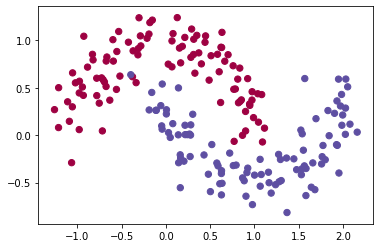

In [54]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.15)
y = y.reshape(200,1)
plt.scatter(X[:,0], X[:,1], s=40, c=y.flatten(), cmap=plt.cm.Spectral)

In [55]:
def predict(model, x):
    # Do forward pass
    c = forward_prop(model,x)

    #get y_hat
    y_hat = c['a2']
    
    # Turn values to either 1 or 0
    y_hat[y_hat > 0.5] = 1
    y_hat[y_hat < 0.5] = 0
    return y_hat

In [56]:
def calc_accuracy(model,x,y):
    # Get total number of examples
    m = y.shape[0]
    
    # Do a prediction with the model
    pred = predict(model,x)
    
    # Ensure prediction and truth vector y have the same shape
    pred = pred.reshape(y.shape)
    
    # Calculate the number of wrong examples
    error = np.sum(np.abs(pred-y))
    
    # Calculate accuracy
    return (m - error)/m * 100

In [57]:
def initialize_parameters(nn_input_dim, nn_hdim, nn_output_dim):
   
    # First layer weights
    W1 = 2 *np.random.randn(nn_input_dim, nn_hdim) - 1
    
    # First layer bias
    b1 = np.zeros((1, nn_hdim))
    
    # Second layer weights
    W2 = 2 * np.random.randn(nn_hdim, nn_output_dim) - 1
    
    # Second layer bias
    b2 = np.zeros((1, nn_output_dim))
    
    # Package and return model
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

In [58]:
def update_parameters(model, grads, learning_rate):
    # Load parameters
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Update parameters
    W1 -= learning_rate * grads['dW1']
    b1 -= learning_rate * grads['db1']
    W2 -= learning_rate * grads['dW2']
    b2 -= learning_rate * grads['db2']
    
    # Store and return parameters
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model


In [59]:
def train(model, X_, y_, learning_rate, num_passes=20000, print_loss=False):
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        cache = forward_prop(model,X_)
        #a1, probs = cache['a1'],cache['a2']
        # Backpropagation
        
        grads = backward_prop(model,cache,y)
        # Gradient descent parameter update
        # Assign new parameters to the model
        model = update_parameters(model=model,grads=grads,learning_rate=learning_rate)
    
        # Pring loss & accuracy every 100 iterations
        if print_loss and i % 100 == 0:
            y_hat = cache['a2']
            print('Loss after iteration',i,':',bce_loss(y,y_hat))
            print('Accuracy after iteration',i,':',calc_accuracy(model,X_,y_),'%')
    
    return model

In [60]:
# Hyper parameters
hiden_layer_size = 3
# I picked this value because it showed good results in my experiments
learning_rate = 0.01

In [61]:
# Initialize the parameters to random values. We need to learn these.
np.random.seed(0)
# This is what we return at the end
model = initialize_parameters(nn_input_dim=2, nn_hdim= hiden_layer_size, nn_output_dim= 1)
model = train(model,X,y,learning_rate=learning_rate,num_passes=1000,print_loss=True)

Loss after iteration 0 : 0.7590872634269914
Accuracy after iteration 0 : 86.5 %
Loss after iteration 100 : 0.2574839032266012
Accuracy after iteration 100 : 87.5 %
Loss after iteration 200 : 0.23296065120384313
Accuracy after iteration 200 : 91.0 %
Loss after iteration 300 : 0.06607469435606936
Accuracy after iteration 300 : 98.5 %
Loss after iteration 400 : 0.03904889176738763
Accuracy after iteration 400 : 99.0 %
Loss after iteration 500 : 0.03162355657934104
Accuracy after iteration 500 : 99.5 %
Loss after iteration 600 : 0.02808346934457766
Accuracy after iteration 600 : 99.5 %
Loss after iteration 700 : 0.025967242193864887
Accuracy after iteration 700 : 99.5 %
Loss after iteration 800 : 0.02453302540660519
Accuracy after iteration 800 : 99.5 %
Loss after iteration 900 : 0.023480001190426873
Accuracy after iteration 900 : 99.5 %


In [63]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

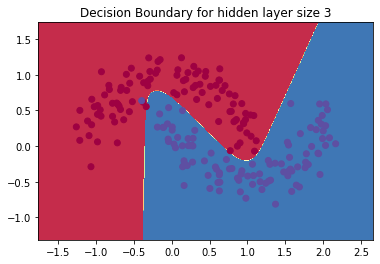

In [64]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model,x))
plt.title("Decision Boundary for hidden layer size 3")

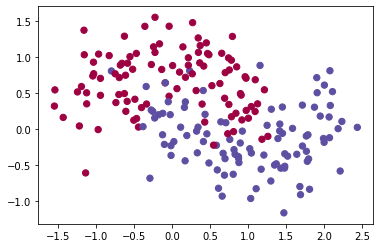

In [65]:
# Now with more noise
# Generate a dataset and plot it
np.random.seed(0)
# The data generator alows us to regulate the noise level
X, y = sklearn.datasets.make_moons(200, noise=0.3)
y = y.reshape(200,1)
plt.scatter(X[:,0], X[:,1], s=40, c=y.flatten(), cmap=plt.cm.Spectral)

In [66]:
# Hyper parameters
hiden_layer_size = 1
# I picked this value because it showed good results in my experiments
learning_rate = 0.01

# Initialize the parameters to random values. We need to learn these.
np.random.seed(0)
# This is what we return at the end
model = initialize_parameters(nn_input_dim=2, nn_hdim= hiden_layer_size, nn_output_dim= 1)
model = train(model,X,y,learning_rate=learning_rate,num_passes=1000,print_loss=True)

Loss after iteration 0 : 0.5961576235993598
Accuracy after iteration 0 : 68.5 %
Loss after iteration 100 : 0.3576338205351404
Accuracy after iteration 100 : 83.5 %
Loss after iteration 200 : 0.37700188869630924
Accuracy after iteration 200 : 83.5 %
Loss after iteration 300 : 0.3769594818049994
Accuracy after iteration 300 : 83.5 %
Loss after iteration 400 : 0.3769526507972909
Accuracy after iteration 400 : 83.5 %
Loss after iteration 500 : 0.37695128678554995
Accuracy after iteration 500 : 83.5 %
Loss after iteration 600 : 0.37695100261609
Accuracy after iteration 600 : 83.5 %
Loss after iteration 700 : 0.37695094286213987
Accuracy after iteration 700 : 83.5 %
Loss after iteration 800 : 0.3769509302725343
Accuracy after iteration 800 : 83.5 %
Loss after iteration 900 : 0.3769509276189161
Accuracy after iteration 900 : 83.5 %


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 1')

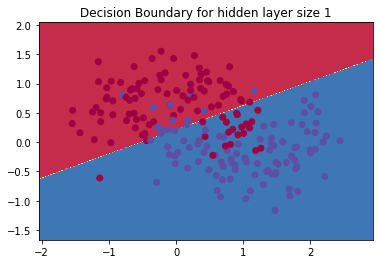

In [67]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model,x))
plt.title("Decision Boundary for hidden layer size 1")

In [68]:
# Hyper parameters
hiden_layer_size = 500
# I picked this value because it showed good results in my experiments
learning_rate = 0.01

# Initialize the parameters to random values. We need to learn these.
np.random.seed(0)
# This is what we return at the end
model = initialize_parameters(nn_input_dim=2, nn_hdim= hiden_layer_size, nn_output_dim= 1)
model = train(model,X,y,learning_rate=learning_rate,num_passes=1000,print_loss=True)

Loss after iteration 0 : 13.066488880281316
Accuracy after iteration 0 : 60.5 %
Loss after iteration 100 : 3.7447509371173497
Accuracy after iteration 100 : 80.0 %
Loss after iteration 200 : 0.8083495766978848
Accuracy after iteration 200 : 90.5 %
Loss after iteration 300 : 3.4341553133743323
Accuracy after iteration 300 : 91.0 %
Loss after iteration 400 : 4.3256788374042925
Accuracy after iteration 400 : 81.0 %
Loss after iteration 500 : 0.8486686785969225
Accuracy after iteration 500 : 86.5 %
Loss after iteration 600 : 0.6921060785642937
Accuracy after iteration 600 : 87.0 %
Loss after iteration 700 : 0.8299360488501888
Accuracy after iteration 700 : 92.0 %
Loss after iteration 800 : 0.2620317319983198
Accuracy after iteration 800 : 91.0 %
Loss after iteration 900 : 0.5142120440311113
Accuracy after iteration 900 : 92.5 %


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 500')

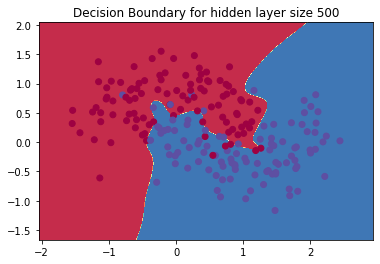

In [69]:
# Plot the decision boundary
# This might take a little while as our model is very big now
plot_decision_boundary(lambda x: predict(model,x))
plt.title("Decision Boundary for hidden layer size 500")

## Keras

In [70]:
from keras.layers import Dense, Activation

In [71]:
import sklearn
import sklearn.datasets
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.15)
y = y.reshape(200,1)

In [72]:
from keras.layers import Dense, Activation
from keras.models import Sequential

In [73]:
model = Sequential()
model.add(Dense(3, input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(optimizer = 'sgd',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 9         
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [75]:
history = model.fit(x=X, y=y, epochs=900)

Epoch 1/900
7/7 [==============================] - 0s 1ms/step - loss: 0.7814 - acc: 0.2200
Epoch 2/900
7/7 [==============================] - 0s 1ms/step - loss: 0.7773 - acc: 0.2200
Epoch 3/900
7/7 [==============================] - 0s 2ms/step - loss: 0.7732 - acc: 0.2300
Epoch 4/900
7/7 [==============================] - 0s 2ms/step - loss: 0.7693 - acc: 0.2300
Epoch 5/900
7/7 [==============================] - 0s 2ms/step - loss: 0.7658 - acc: 0.2100
Epoch 6/900
7/7 [==============================] - 0s 2ms/step - loss: 0.7623 - acc: 0.2300
Epoch 7/900
7/7 [==============================] - 0s 2ms/step - loss: 0.7590 - acc: 0.2200
Epoch 8/900
7/7 [==============================] - 0s 2ms/step - loss: 0.7559 - acc: 0.2200
Epoch 9/900
7/7 [==============================] - 0s 2ms/step - loss: 0.7528 - acc: 0.2200
Epoch 10/900
7/7 [==============================] - 0s 2ms/step - loss: 0.7498 - acc: 0.2250
Epoch 11/900
7/7 [==============================] - 0s 2ms/step - loss: 0.7471 

7/7 [==============================] - 0s 2ms/step - loss: 0.6251 - acc: 0.7000
Epoch 90/900
7/7 [==============================] - 0s 2ms/step - loss: 0.6230 - acc: 0.7150
Epoch 91/900
7/7 [==============================] - 0s 2ms/step - loss: 0.6210 - acc: 0.7150
Epoch 92/900
7/7 [==============================] - 0s 2ms/step - loss: 0.6189 - acc: 0.7300
Epoch 93/900
7/7 [==============================] - 0s 2ms/step - loss: 0.6168 - acc: 0.7300
Epoch 94/900
7/7 [==============================] - 0s 2ms/step - loss: 0.6146 - acc: 0.7300
Epoch 95/900
7/7 [==============================] - 0s 2ms/step - loss: 0.6122 - acc: 0.7300
Epoch 96/900
7/7 [==============================] - 0s 2ms/step - loss: 0.6099 - acc: 0.7350
Epoch 97/900
7/7 [==============================] - 0s 2ms/step - loss: 0.6077 - acc: 0.7350
Epoch 98/900
7/7 [==============================] - 0s 2ms/step - loss: 0.6053 - acc: 0.7350
Epoch 99/900
7/7 [==============================] - 0s 2ms/step - loss: 0.6030 - ac

7/7 [==============================] - 0s 2ms/step - loss: 0.4286 - acc: 0.8000
Epoch 177/900
7/7 [==============================] - 0s 2ms/step - loss: 0.4271 - acc: 0.8000
Epoch 178/900
7/7 [==============================] - 0s 2ms/step - loss: 0.4256 - acc: 0.8000
Epoch 179/900
7/7 [==============================] - 0s 2ms/step - loss: 0.4243 - acc: 0.8000
Epoch 180/900
7/7 [==============================] - 0s 2ms/step - loss: 0.4228 - acc: 0.8000
Epoch 181/900
7/7 [==============================] - 0s 2ms/step - loss: 0.4213 - acc: 0.8000
Epoch 182/900
7/7 [==============================] - 0s 2ms/step - loss: 0.4198 - acc: 0.8000
Epoch 183/900
7/7 [==============================] - 0s 2ms/step - loss: 0.4184 - acc: 0.8000
Epoch 184/900
7/7 [==============================] - 0s 2ms/step - loss: 0.4170 - acc: 0.8000
Epoch 185/900
7/7 [==============================] - 0s 2ms/step - loss: 0.4156 - acc: 0.8000
Epoch 186/900
7/7 [==============================] - 0s 2ms/step - loss: 0

7/7 [==============================] - 0s 2ms/step - loss: 0.3494 - acc: 0.8350
Epoch 264/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3488 - acc: 0.8350
Epoch 265/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3483 - acc: 0.8350
Epoch 266/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3479 - acc: 0.8350
Epoch 267/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3474 - acc: 0.8350
Epoch 268/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3469 - acc: 0.8350
Epoch 269/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3463 - acc: 0.8350
Epoch 270/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3458 - acc: 0.8350
Epoch 271/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3453 - acc: 0.8350
Epoch 272/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3448 - acc: 0.8350
Epoch 273/900
7/7 [==============================] - 0s 2ms/step - loss: 0

7/7 [==============================] - 0s 2ms/step - loss: 0.3164 - acc: 0.8500
Epoch 351/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3160 - acc: 0.8500
Epoch 352/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3158 - acc: 0.8500
Epoch 353/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3155 - acc: 0.8500
Epoch 354/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3153 - acc: 0.8500
Epoch 355/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3151 - acc: 0.8500
Epoch 356/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3149 - acc: 0.8500
Epoch 357/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3146 - acc: 0.8500
Epoch 358/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3144 - acc: 0.8500
Epoch 359/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3141 - acc: 0.8500
Epoch 360/900
7/7 [==============================] - 0s 2ms/step - loss: 0

7/7 [==============================] - 0s 2ms/step - loss: 0.3006 - acc: 0.8700
Epoch 438/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3004 - acc: 0.8700
Epoch 439/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3003 - acc: 0.8700
Epoch 440/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3002 - acc: 0.8700
Epoch 441/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3002 - acc: 0.8700
Epoch 442/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3000 - acc: 0.8700
Epoch 443/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2998 - acc: 0.8700
Epoch 444/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2997 - acc: 0.8700
Epoch 445/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2997 - acc: 0.8700
Epoch 446/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2995 - acc: 0.8700
Epoch 447/900
7/7 [==============================] - 0s 2ms/step - loss: 0

7/7 [==============================] - 0s 2ms/step - loss: 0.2929 - acc: 0.8750
Epoch 525/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2928 - acc: 0.8750
Epoch 526/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2927 - acc: 0.8750
Epoch 527/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2927 - acc: 0.8750
Epoch 528/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2927 - acc: 0.8750
Epoch 529/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2926 - acc: 0.8750
Epoch 530/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2925 - acc: 0.8750
Epoch 531/900
7/7 [==============================] - 0s 1ms/step - loss: 0.2925 - acc: 0.8750
Epoch 532/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2924 - acc: 0.8750
Epoch 533/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2924 - acc: 0.8800
Epoch 534/900
7/7 [==============================] - 0s 2ms/step - loss: 0

7/7 [==============================] - 0s 2ms/step - loss: 0.2894 - acc: 0.8850
Epoch 612/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2894 - acc: 0.8850
Epoch 613/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2893 - acc: 0.8850
Epoch 614/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2892 - acc: 0.8850
Epoch 615/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2893 - acc: 0.8850
Epoch 616/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2892 - acc: 0.8850
Epoch 617/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2892 - acc: 0.8850
Epoch 618/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2892 - acc: 0.8850
Epoch 619/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2892 - acc: 0.8850
Epoch 620/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2892 - acc: 0.8850
Epoch 621/900
7/7 [==============================] - 0s 2ms/step - loss: 0

7/7 [==============================] - 0s 2ms/step - loss: 0.2875 - acc: 0.8850
Epoch 698/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2875 - acc: 0.8800
Epoch 699/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2875 - acc: 0.8800
Epoch 700/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2875 - acc: 0.8800
Epoch 701/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2875 - acc: 0.8850
Epoch 702/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2875 - acc: 0.8800
Epoch 703/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2874 - acc: 0.8800
Epoch 704/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2874 - acc: 0.8800
Epoch 705/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2874 - acc: 0.8800
Epoch 706/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2874 - acc: 0.8800
Epoch 707/900
7/7 [==============================] - 0s 2ms/step - loss: 0

7/7 [==============================] - 0s 2ms/step - loss: 0.2865 - acc: 0.8800
Epoch 784/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2866 - acc: 0.8800
Epoch 785/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2865 - acc: 0.8800
Epoch 786/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2865 - acc: 0.8850
Epoch 787/900
7/7 [==============================] - ETA: 0s - loss: 0.3641 - acc: 0.812 - 0s 2ms/step - loss: 0.2864 - acc: 0.8850
Epoch 788/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2864 - acc: 0.8800
Epoch 789/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2865 - acc: 0.8800
Epoch 790/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2865 - acc: 0.8800
Epoch 791/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2865 - acc: 0.8800
Epoch 792/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2864 - acc: 0.8850
Epoch 793/900
7/7 [=================

7/7 [==============================] - 0s 2ms/step - loss: 0.2859 - acc: 0.8850
Epoch 870/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2859 - acc: 0.8800
Epoch 871/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2859 - acc: 0.8800
Epoch 872/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2858 - acc: 0.8800
Epoch 873/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2859 - acc: 0.8800
Epoch 874/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2860 - acc: 0.8750
Epoch 875/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2859 - acc: 0.8800
Epoch 876/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2859 - acc: 0.8800
Epoch 877/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2859 - acc: 0.8800
Epoch 878/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2860 - acc: 0.8800
Epoch 879/900
7/7 [==============================] - 0s 2ms/step - loss: 0